In [ ]:
# goal: test if removing individual passes influences the overall distributions! use category cases as a test (smallest sample sizes / most likely influenced by removing passes)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir("/Users/etmu9498/research/code/scripts-winter2023/cloud-top-height-stats")
import distributions_general
import distributions_general_flight_legs as xypaths

In [4]:
# load all eye passes saved in local dataset. To be used in tests below
# not necessary if code above is run!
passes = pd.read_pickle("/Users/etmu9498/research/data/all_metadata.pkl")

# passes
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(passes)

Number of data points in original dist: 3115
Number of Monte Carlo Tests: 12
td distribution created


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Number of data points in original dist: 4964
Number of Monte Carlo Tests: 38


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ts distribution created
Number of data points in original dist: 2775
Number of Monte Carlo Tests: 21


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


wh distribution created
Number of data points in original dist: 1143
Number of Monte Carlo Tests: 15
sh distribution created


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


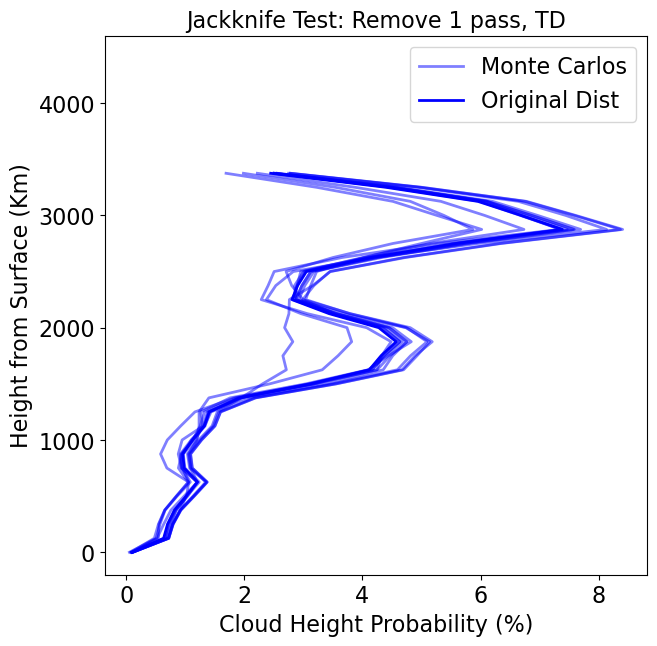

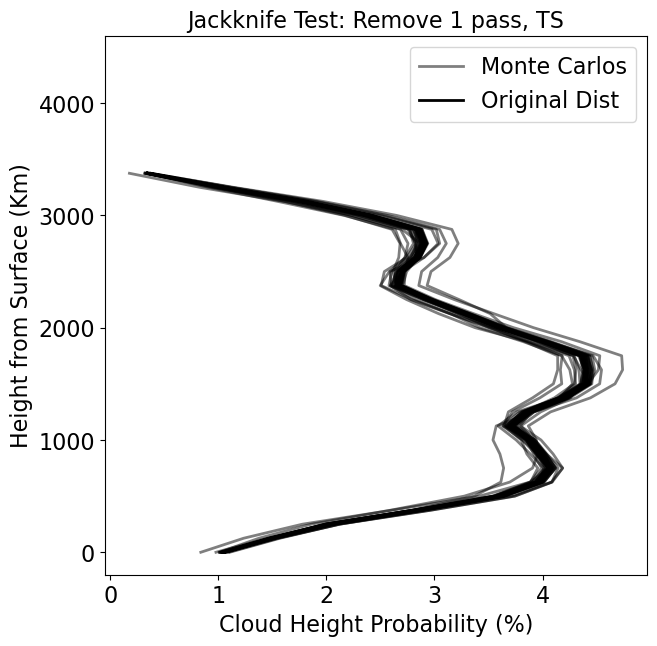

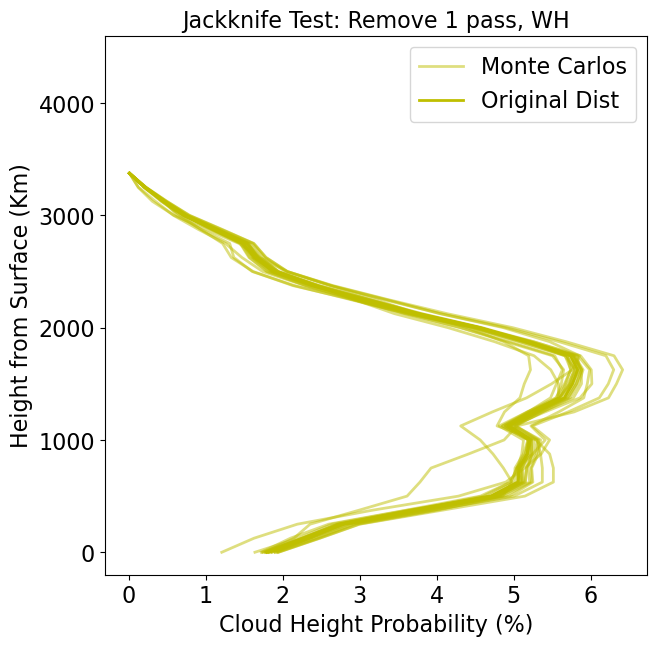

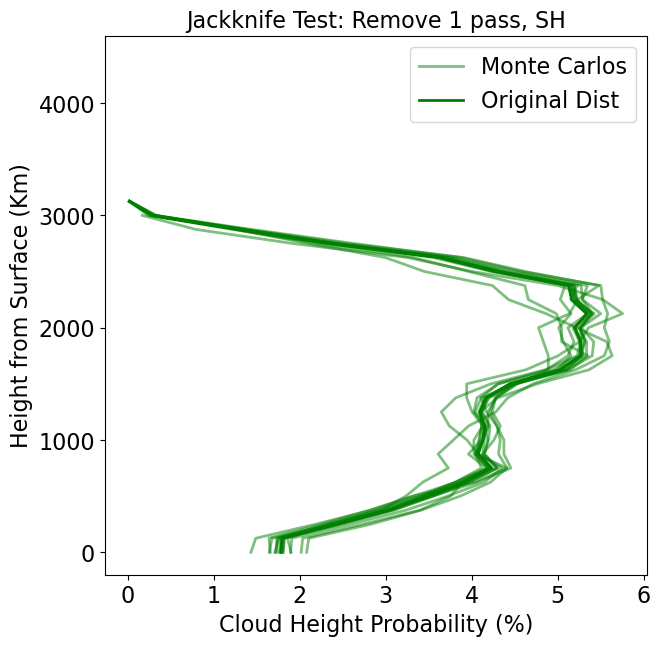

In [7]:
# start the monte carlo tests here!

# only use TDs for the initial test
cats = ['td', 'ts', 'wh', 'sh']
colors = ['b', 'k', 'y', 'g']
# savenames = ['monte-smooth-td.png', 'monte-smooth-ts.png', 'monte-smooth-wh.png', 'monte-smooth-sh.png']
savenames = ['jackknife-smooth-td.png', 'jackknife-smooth-ts.png', 'jackknife-smooth-wh.png', 'jackknife-smooth-sh.png']

# titles = [': Remove 1 Pass, TD', ': Remove 1 Pass, TS', ': Remove 1 Pass, WH', ': Remove 1 Pass, SH']
titlecase = ['TD', 'TS', 'WH', 'SH']
totalpts = [3115, 4964, 2775, 1143]
for cati, cat in enumerate(cats):
    # passes to remove from analysis
    tc = np.where( ~ ( passes['category'] == cat))[0].tolist()    
    keepinds = np.where( ( passes['category'] == cat))[0].tolist()
    
    # jackknife test v1: remove individual eye passes
    title = ': Remove 1 pass, ' + titlecase[cati]
    distributions_general.plot_monte_carlo( keepinds=keepinds, removeinds=tc, df_passes=passes, binwidth=125, smoothwidth=5, color=colors[cati], title=title)

    # monte carlo test v2: remove a set number of data points
    # n = 100
    # title = ': Remove ' + str( int(totalpts[cati] / 2)) + ' points ' + str( n) + ' times, ' + titlecase[cati]
    # distributions_general.plot_monte_carlo_random_remove( removecount= int(totalpts[cati] / 2), ntests=n, removeinds=tc, df_passes=passes, binwidth=125, smoothwidth=5, color=colors[cati], title=title)

    os.chdir('/Users/etmu9498/research/figures/zhien-emails/6-21-23')
    plt.savefig(savenames[cati], bbox_inches='tight')
    
    print( cat + " distribution created")

All eye passes loaded.
Total number of lidar data points: 11997

TD
cases: 12
orig number of data points: 3115
non zero number of data points: 2530
orig mean ht = 1836.329
non zero mean ht = 2260.021
clear air % = 18.799999999999994

TS
cases: 38
orig number of data points: 4964
non zero number of data points: 4197
orig mean ht = 1347.257
non zero mean ht = 1592.704
clear air % = 15.500000000000004

WH
cases: 21
orig number of data points: 2775
non zero number of data points: 2626
orig mean ht = 1292.05
non zero mean ht = 1365.124
clear air % = 5.400000000000005

SH
cases: 15
orig number of data points: 1143
non zero number of data points: 1065
orig mean ht = 1429.815
non zero mean ht = 1534.204
clear air % = 6.799999999999995


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


All eye passes loaded.
Total number of lidar data points: 11997

TD
cases: 12
orig number of data points: 3115
non zero number of data points: 2530
orig mean ht = 1836.329
non zero mean ht = 2260.021
clear air % = 18.799999999999994

TS
cases: 38
orig number of data points: 4964
non zero number of data points: 4197
orig mean ht = 1347.257
non zero mean ht = 1592.704
clear air % = 15.500000000000004

WH
cases: 21
orig number of data points: 2775
non zero number of data points: 2626
orig mean ht = 1292.05
non zero mean ht = 1365.124
clear air % = 5.400000000000005

SH
cases: 15
orig number of data points: 1143
non zero number of data points: 1065
orig mean ht = 1429.815
non zero mean ht = 1534.204
clear air % = 6.799999999999995


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


All eye passes loaded.
Total number of lidar data points: 11997

TD
cases: 12
orig number of data points: 3115
non zero number of data points: 2530
orig mean ht = 1836.329
non zero mean ht = 2260.021
clear air % = 18.799999999999994

TS
cases: 38
orig number of data points: 4964
non zero number of data points: 4197
orig mean ht = 1347.257
non zero mean ht = 1592.704
clear air % = 15.500000000000004

WH
cases: 21
orig number of data points: 2775
non zero number of data points: 2626
orig mean ht = 1292.05
non zero mean ht = 1365.124
clear air % = 5.400000000000005

SH
cases: 15
orig number of data points: 1143
non zero number of data points: 1065
orig mean ht = 1429.815
non zero mean ht = 1534.204
clear air % = 6.799999999999995


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


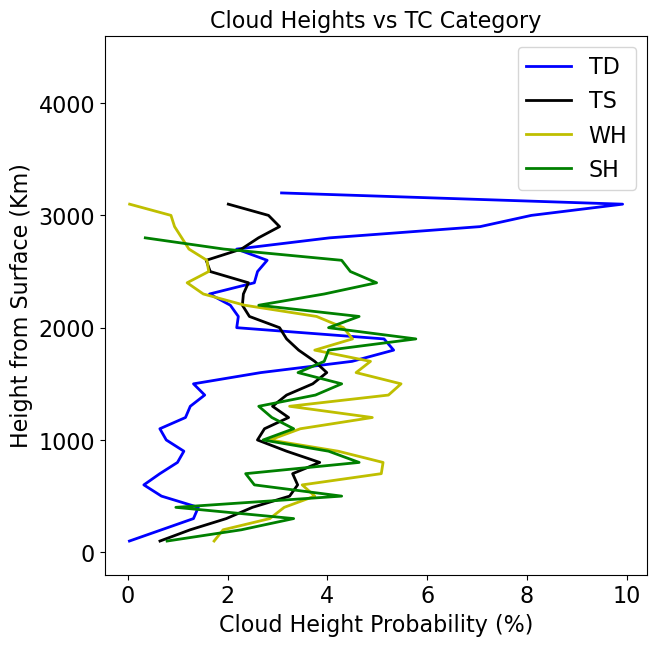

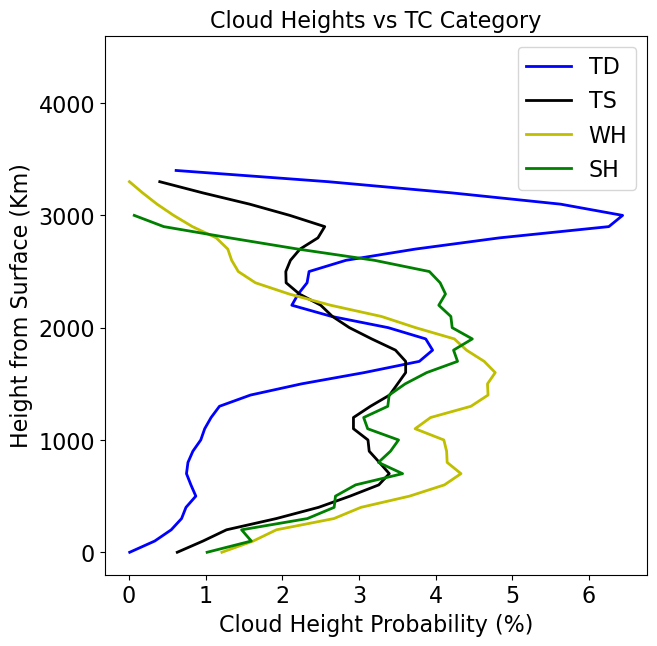

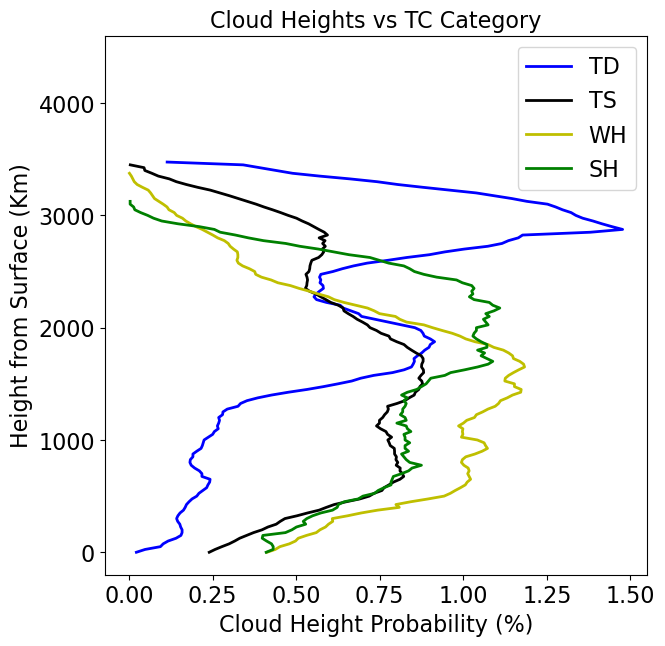

In [8]:
# original category tests (using different probability axes)

# plotting individual distributions
# passes = distributions_general.plot_composites(tc='all', bintype='category', plottype='all', binwidth=25, smoothwidth=25, xaxistype='probability')
# passes = distributions_general.plot_composites(tc='all', bintype='category', plottype='all', binwidth=25, smoothwidth=25, xaxistype='probability-norm')

passes = distributions_general.plot_composites(tc='all', bintype='category', plottype='averaged', binwidth=100, smoothwidth=1)
passes = distributions_general.plot_composites(tc='all', bintype='category', plottype='averaged', binwidth=100, smoothwidth=5)

# currently using this figure!
passes = distributions_general.plot_composites(tc='all', bintype='category', plottype='averaged', binwidth=25, smoothwidth=25)

Shear Relative Eye Flight Legs: TD, all
Total scatter points to add:3115


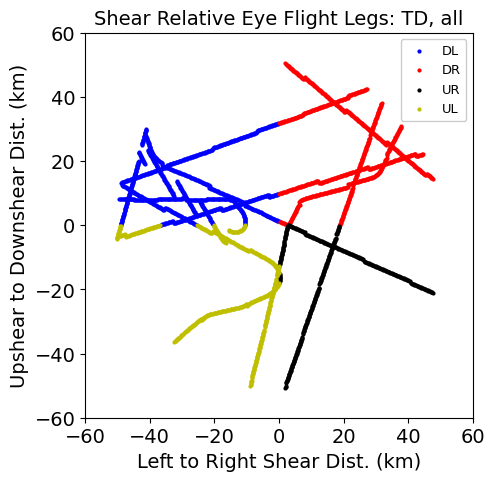

Shear Relative Eye Flight Legs: TS, all
Total scatter points to add:4964


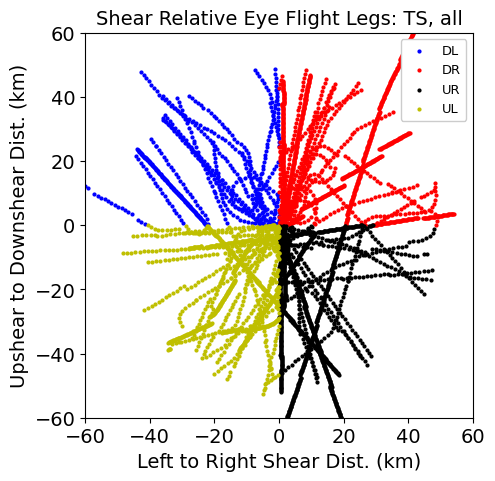

Shear Relative Eye Flight Legs: WH, all
Total scatter points to add:2775


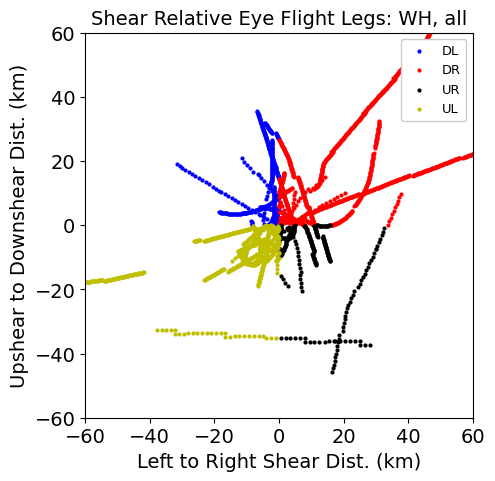

Shear Relative Eye Flight Legs: SH, all
Total scatter points to add:1143


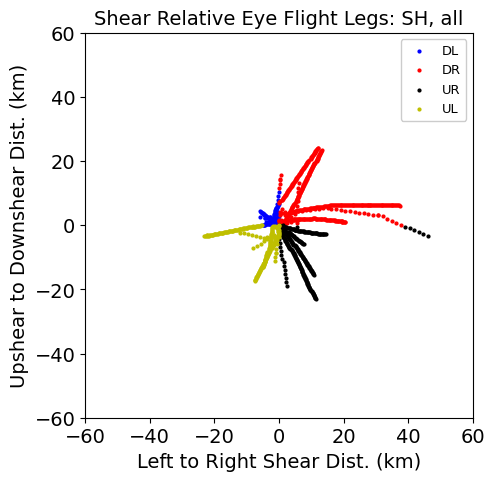

In [10]:
# using the passes dataset returned above, make a simple xy flight leg path plot for each TC category

# sort for different TC categories
cats = ['td', 'ts', 'wh', 'sh']

tc = 'all'
for cat in cats:
    passestrim = passes.drop(index=np.where( ~ ( passes['category'] == cat))[0])
    passestrim = passestrim.reset_index()
    if not tc.lower() == 'all':
        passestrim = passestrim.drop(index=np.where( ~ ( passestrim['flight'].str[0:4] == tc))[0])
        passestrim = passestrim.reset_index()
    title = "Shear Relative Eye Flight Legs: " + cat.upper() + ", " + tc
    print(title)
    
    res = 60
    xypaths.xyplots( passestrim, res, res, title)

Shear Relative Eye Flight Legs: <64, all
number of cases: 50
Total scatter points to add:8079


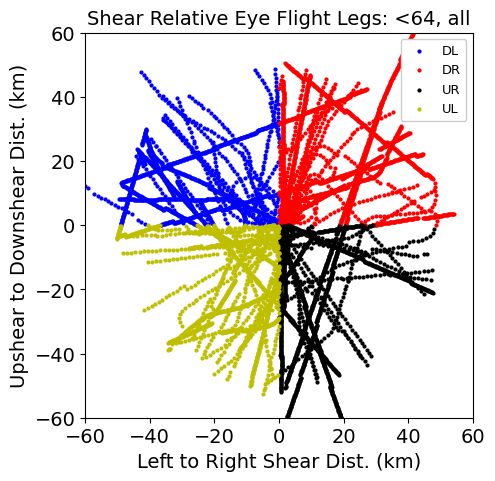

Shear Relative Eye Flight Legs: >=64, all
number of cases: 36
Total scatter points to add:3918


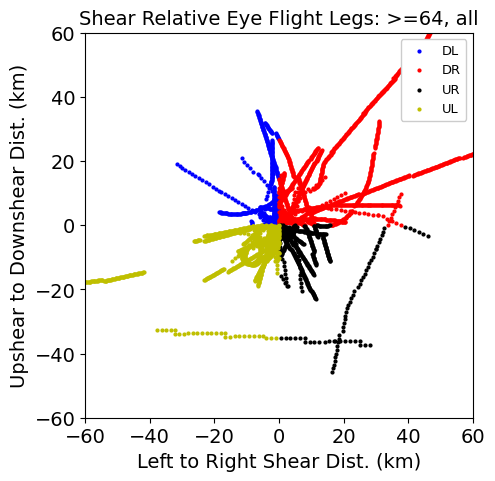

'\ntc = \'all\'\nfor i in range(2):\n    if i == 0:\n        passestrim = passes.drop(index=np.where( ~ passes[\'Defined Eyewalls\'])[0])\n        passestrim = passestrim.reset_index()\n        title = "Shear Relative Eye Flight Legs: Defined Eyewalls, " + tc\n    elif i == 1:\n        passestrim = passes.drop(index=np.where( passes[\'Defined Eyewalls\'])[0])\n        passestrim = passestrim.reset_index()\n        title = "Shear Relative Eye Flight Legs: Undefined Eyewalls, " + tc\n        \n    if not tc.lower() == \'all\':\n        passestrim = passestrim.drop(index=np.where( ~ ( passestrim[\'flight\'].str[0:4] == tc))[0])\n        passestrim = passestrim.reset_index()\n    \n    print(title)\n    print("number of cases: " + str(len(passestrim[\'flight\'].values)))\n    res = 60\n    xypaths.xyplots( passestrim, res, res, title)\n    \n'

In [11]:
# a similar test as above, but composite based on intensity (split into strong and weak categories) or defined eyewall limits


# sort for different TC intensities
cutoff = 64
tc = 'all'
for i in range(2):    
    if i == 0:
        passestrim = passes.drop(index=np.where( passes['intensity'] > cutoff)[0])
        passestrim = passestrim.reset_index()
        title = "Shear Relative Eye Flight Legs: <" + str(cutoff) + ", " + tc
    elif i == 1:
        passestrim = passes.drop(index=np.where( passes['intensity'] <= cutoff)[0])
        passestrim = passestrim.reset_index()
        title = "Shear Relative Eye Flight Legs: >=" + str(cutoff) + ", " + tc
    if not tc.lower() == 'all':
        passestrim = passestrim.drop(index=np.where( ~ ( passestrim['flight'].str[0:4] == tc))[0])
        passestrim = passestrim.reset_index()
    
    print(title)
    print("number of cases: " + str(len(passestrim['flight'].values)))
    res = 60
    xypaths.xyplots( passestrim, res, res, title)

'''
tc = 'all'
for i in range(2):
    if i == 0:
        passestrim = passes.drop(index=np.where( ~ passes['Defined Eyewalls'])[0])
        passestrim = passestrim.reset_index()
        title = "Shear Relative Eye Flight Legs: Defined Eyewalls, " + tc
    elif i == 1:
        passestrim = passes.drop(index=np.where( passes['Defined Eyewalls'])[0])
        passestrim = passestrim.reset_index()
        title = "Shear Relative Eye Flight Legs: Undefined Eyewalls, " + tc
        
    if not tc.lower() == 'all':
        passestrim = passestrim.drop(index=np.where( ~ ( passestrim['flight'].str[0:4] == tc))[0])
        passestrim = passestrim.reset_index()
    
    print(title)
    print("number of cases: " + str(len(passestrim['flight'].values)))
    res = 60
    xypaths.xyplots( passestrim, res, res, title)
    
'''